# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [2]:
!pip install numpy
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import the core data science libraries:

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [97]:
df = pd.read_csv('./data/rawdata.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [98]:
# Showing 5 random rows
df.sample(5)

,Borough,Borough/Citywide Office (B/CO),District,School,School Name,School Category,Program,Language,Language (Translated),General/Special Education,Special Education Model
42,Manhattan,Manhattan,4,04M206,P.S. 206 Jose Celso Barbosa,K-8,Dual Language,Spanish,Español,General Education,Not Applicable
44,Manhattan,Manhattan,4,04M372,Esperanza Preparatory Academy,Secondary School,Dual Language,Spanish,Español,General Education,Not Applicable
474,Staten Island,Staten Island,31,31R022,P.S. 022 Graniteville,Elementary,Dual Language,Spanish,Español,General Education,Not Applicable
81,Manhattan,Manhattan,6,06M311,Amistad Dual Language School,K-8,Dual Language,Spanish,Español,General Education,Not Applicable
130,Bronx,Bronx,9,09X028,P.S. 028 Mount Hope,Elementary,Transitional Bilingual Education,Spanish,Español,General Education,Not Applicable


In [99]:
# Show each of the column names and their data types
df.dtypes

Borough                           object
Borough/Citywide Office (B/CO)    object
District                           int64
School                            object
School Name                       object
School Category                   object
Program                           object
Language                          object
Language (Translated)             object
General/Special Education         object
Special Education Model           object
dtype: object

In [95]:
# Show any unique features of your chosen data set
df.nunique()

Borough                             5
Borough/Citywide Office (B/CO)      9
District                           32
School                            376
School Name                       376
School Category                     8
Program                             2
Language                           12
General/Special Education           2
Special Education Model             7
dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

I've checked that there are no missing values and duplicate rows, so no additional cleaning is needed in this regard. I decide to drop some rrrelevant columns for better data analysis and standardize categorical data to achieve case consistency.
### Standardize Categorical Data
In the "School Names" and "Borough/Citywide Office (B/CO)" columns, there are word case inconsistencies, so I want to ensure consistent casing to avoid confusion during analysis. Capitalize the first letter of each word in these two columns.

In [100]:
df['School Name'] = df['School Name'].str.title()
df['Borough/Citywide Office (B/CO)'] = df['Borough/Citywide Office (B/CO)'].str.title()

# Displaying 5 sample rows after standardization
df.sample(5)

,Borough,Borough/Citywide Office (B/CO),District,School,School Name,School Category,Program,Language,Language (Translated),General/Special Education,Special Education Model
284,Brooklyn,Brooklyn North,15,15K896,The School Of Creativity And Innovation,Elementary,Dual Language,Chinese,中文,General Education,Not Applicable
524,Bronx,District 75,75,75X168,P.S. 168,K-12 all grades,Transitional Bilingual Education,Spanish,Español,Special Education,6:1:1
454,Queens,Queens North,30,30Q166,P.S. 166 Henry Gradstein,Elementary,Dual Language,Spanish,Español,General Education,Not Applicable
531,Bronx,District 75,75,75X721,P.S. X721 - Stephen Mcsweeney School,High school,Transitional Bilingual Education,Spanish,Español,Special Education,6:1:1
96,Manhattan,Manhattan,6,06M462,The College Academy,High school,Dual Language,Spanish,Español,General Education,Not Applicable


Ensure consistent casing.

In [101]:
# Capitalize the first letter of 'Borough' and 'School Category' Columns
df['Borough'] = df['Borough'].str.title()
df['School Category'] = df['School Category'].str.title()

# Displaying 5 sample rows after data transformation
df.sample(5)

,Borough,Borough/Citywide Office (B/CO),District,School,School Name,School Category,Program,Language,Language (Translated),General/Special Education,Special Education Model
237,Brooklyn,Brooklyn North,14,14K050,J.H.S. 050 John D. Wells,Junior High-Intermediate-Middle,Dual Language,Spanish,Español,General Education,Not Applicable
221,Bronx,Bronx,12,12X458,Samara Community School,Elementary,Dual Language,Spanish,Español,Special Education,ICT
109,Bronx,Bronx,7,07X018,P.S. 018 John Peter Zenger,Elementary,Dual Language,Spanish,Español,General Education,Not Applicable
106,Manhattan,Manhattan,6,06M552,Gregorio Luperon High School For Science And M...,High School,Transitional Bilingual Education,Spanish,Español,General Education,Not Applicable
217,Bronx,Bronx,12,12X195,P.S. 195,Elementary,Transitional Bilingual Education,Spanish,Español,General Education,Not Applicable


### Dropped Unnecessary Columns for Data
The column 'Language (Translated)' is unnecessary for data analysis.

In [102]:
df.drop(columns=['Language (Translated)'], inplace=True, errors='ignore')

# Displaying 5 sample rows after data transformation
df.sample(5)

,Borough,Borough/Citywide Office (B/CO),District,School,School Name,School Category,Program,Language,General/Special Education,Special Education Model
393,Queens,Queens North,24,24Q455,Newtown High School,High School,Transitional Bilingual Education,Spanish,General Education,Not Applicable
190,Bronx,Bronx,10,10X246,P.S. 246 Poe Center,Elementary,Transitional Bilingual Education,Spanish,General Education,Not Applicable
153,Bronx,Bronx,9,09X294,The Walton Avenue School,Elementary,Transitional Bilingual Education,Spanish,General Education,Not Applicable
488,Brooklyn,Brooklyn North,32,32K116,P.S. 116 Elizabeth L Farrell,Elementary,Dual Language,Spanish,General Education,Not Applicable
389,Queens,Queens North,24,24Q211,Elm Tree Elementary School,Elementary,Dual Language,Spanish,General Education,Not Applicable


### Save the Cleaned Dataset as a New CSV File.

In [103]:
cleaned_file_path = './data/cleaned_rawdata.csv'
df.to_csv(cleaned_file_path, index=False)

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### Distribution of Schools by Borough
This analysis determines the count of schools in each borough, providing insights into the distribution across Manhattan, Brooklyn, Bronx, Queens, and Staten Island. Help to learn the number of bilingual schools in each region helps to understand the ethnic distribution and the level of education in terms of language in each region.

In [104]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('./data/cleaned_rawdata.csv')

# Count of schools in each borough
schools_by_borough = df_cleaned['Borough'].value_counts()
print(schools_by_borough)

Brooklyn         159
Bronx            134
Queens           121
Manhattan        110
Staten Island     14
Name: Borough, dtype: int64


### Distribution of Schools by School Category within Each Borough
This analysis groups the data by borough and school category to determine the count of schools in each category for each borough.

In [105]:
# Group by 'Borough' and 'School Category' to find the distribution of schools
schools_category_borough = df_cleaned.groupby(['Borough', 'School Category'])['School Name'].count()
print(schools_category_borough)

Borough        School Category                
Bronx          Early Childhood                     1
               Elementary                         65
               High School                        11
               Junior High-Intermediate-Middle    32
               K-12 All Grades                     6
               K-8                                12
               Secondary School                    7
Brooklyn       Early Childhood                     1
               Elementary                         79
               High School                        27
               Junior High-Intermediate-Middle    25
               K-12 All Grades                     8
               K-8                                15
               Secondary School                    4
Manhattan      Early Childhood                     2
               Elementary                         43
               High School                        17
               Junior High-Intermediate-Middle    22

### Count of Schools Offering Dual Language Programs
This analysis identifies the number of schools offering dual language programs, indicating the prevalence of bilingual education.

In [106]:
dual_schools = df_cleaned['Program'].str.contains("Dual Language").sum()
print("Count of Schools Offering Dual Language Programs:", dual_schools)

Count of Schools Offering Dual Language Programs: 267


### Sort Schools by School Category and Count
This analysis sorts the data by the 'School Category' column and counts the number of schools in each category, offering insights into the distribution of school types.

In [107]:
sorted_school = df_cleaned['School Category'].value_counts().sort_values(ascending=False)
print("Count of Schools by School Category (Sorted):",)
print(sorted_school)

Count of Schools by School Category (Sorted):
Elementary                         272
Junior High-Intermediate-Middle    100
High School                         73
K-8                                 48
K-12 All Grades                     18
Secondary School                    15
Early Childhood                     11
Ungraded                             1
Name: School Category, dtype: int64


### Statistical Analysis on Chinese Language Schools by Borough
This analysis calculates values for the maximum, minimum, and average numbers of Chinese language schools, as well as which boroughs have the most and least, helping to learn which regions have the most and least bilingual Chinese-English usage.

In [108]:
chinese_schools = df_cleaned[df_cleaned['Language'].str.contains("Chinese")]

# Group by 'Borough' to count Chinese language schools
chinese_by_borough = chinese_schools.groupby('Borough')['School Name'].count()

# Calculate max, min, and average
chinese_max = chinese_by_borough.max()
chinese_min = chinese_by_borough.min()
chinese_avg = chinese_by_borough.mean()

# Borough with max and min Chinese language schools
borough_max = chinese_by_borough.idxmax()
borough_min = chinese_by_borough.idxmin()

print("Max number of Chinese language schools:", chinese_max)
print("Borough with the most Chinese schools:", borough_max)
print("Min number of Chinese language schools:", chinese_min)
print("Borough with the fewest Chinese schools:", borough_min)
print("Average number of Chinese language schools:", chinese_avg)

Max number of Chinese language schools: 29
Borough with the most Chinese schools: Brooklyn
Min number of Chinese language schools: 13
Borough with the fewest Chinese schools: Manhattan
Average number of Chinese language schools: 22.666666666666668


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### Distribution of Schools by Borough
This bar chart shows the distribution of schools in each borough.

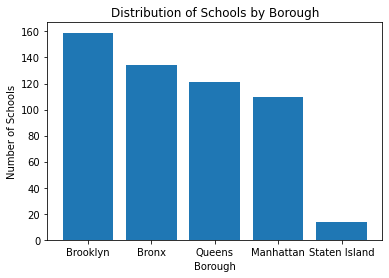

In [92]:
schools_by_borough = df_cleaned['Borough'].value_counts()

plt.bar(schools_by_borough.index, schools_by_borough.values)
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.title("Distribution of Schools by Borough")
plt.show()

### Distribution of Schools by School Category
This pie chart represents the distribution of schools by category. It clearly shows that Bilingual elementary schools have the largest share, while bilingual colleges have only a 0.5% share.

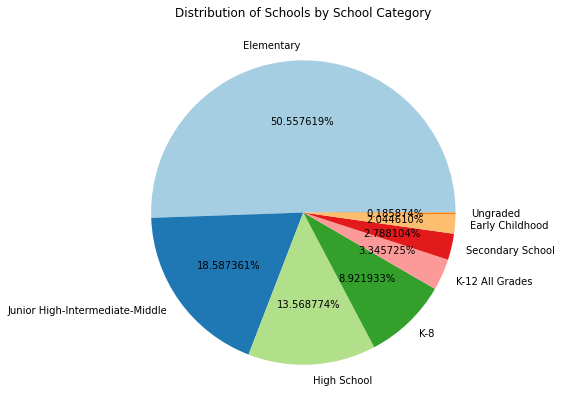

In [42]:
school_category_counts = df_cleaned['School Category'].value_counts()

plt.figure(figsize=(7, 7), facecolor='white') 
plt.pie(
    school_category_counts,
    labels=school_category_counts.index,
    autopct='%1f%%',
    colors=plt.cm.Paired.colors[:len(school_category_counts)]
)
plt.title("Distribution of Schools by School Category")
plt.show()

### Distribution of Districts (Histogram)
This Histogram displays the frequency of district numbers within the dataset. It clearly shows the distribution of bilingual programs in each districts of the New York City, and it can be noticed that there is no bilingual programs in the 40-70 district range.

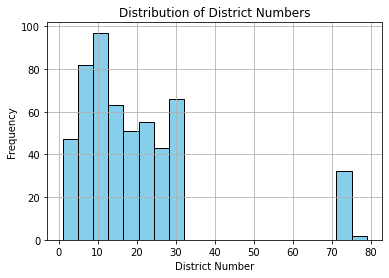

In [56]:
plt.hist(df_cleaned['District'], bins=20, color='skyblue', edgecolor='black')  
plt.xlabel("District Number")
plt.ylabel("Frequency")
plt.title("Distribution of District Numbers")
plt.grid(True)
plt.show()

### Relation between Boroughs and Languages
This bar chart illustrates the relationship between 'Borough' and 'Language', showing how many instances there are for each language by borough. The language use in each borough can be inferred from this bar chart.

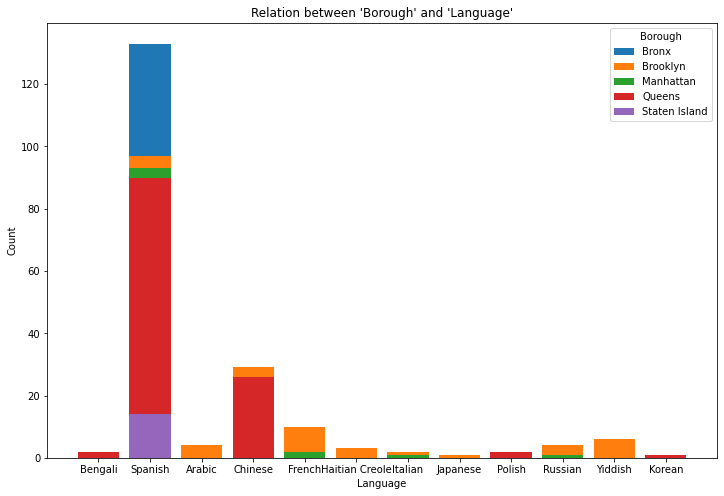

In [69]:
language_count = df_cleaned.groupby(['Borough', 'Language']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
for borough in language_count['Borough'].unique():
    subset = language_count[language_count['Borough'] == borough]
    plt.bar(subset['Language'], subset['Count'], label=borough)

plt.title("Relation between 'Borough' and 'Language'")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title='Borough')
plt.show()

### Distribution of special education models
This pie chart shows the distribution of special education models among the schools, indicating which models are more common in NYC.

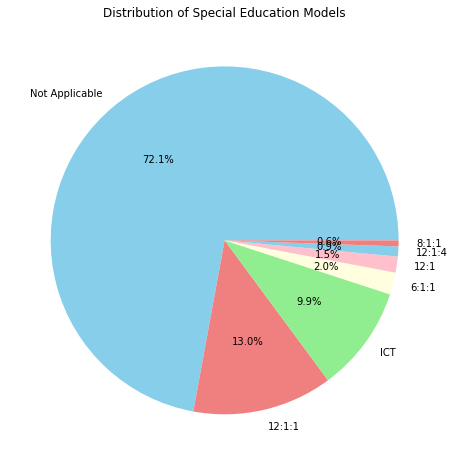

In [91]:
model_counts = df_cleaned['Special Education Model'].value_counts()

plt.figure(figsize=(8, 8),facecolor='white')
plt.pie(model_counts.values, labels=model_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen','lightyellow','pink'])
plt.title('Distribution of Special Education Models')
plt.show()
